## 1.b - Images as Functions and Matrices

In the last section we saw how to set the environment. But the real fun begins with this section, where we actually dive into the actual implementation. Without any further delay, let's get started!

In [6]:
# Import Open-CV
import cv2
# Import numpy
import numpy as np
#Import matplotlib
from matplotlib import pyplot as plt

### Loading and Displaying Images

Now, let's load and display an image, using open-cv.

In [3]:
image = cv2.imread('dataset/car.png')

We have successfully used open-cv's imread function to load our image and store it in a variable called image. But how do we verify if the image is correctly loaded? Do we print the variable?

In [4]:
print(image)

[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]]


Actually no! If we print the image, we will get raw form of the image as an array or a list of pixel values. So, basically, an image is a function of pixel intensity values at each location of the image. 
<br>
[ **Fun Fact** - The word pixel actually means picture elements! ]
<br>
So, an image is actually a collection of all those pixel intensity values represented by **I(x,y)**.
<br>
<br>
But the question still remains how do we display the image?

In [5]:
# Displaying image using imshow from open-cv
cv2.imshow('Image', image)
cv2.waitKey(0)

-1

We can use imshow from open-cv to view the image, but it opens up a new window, which often we might not want. So, we will go for matplotlib's imshow to view images and display it, inline in the jupyter notebooks

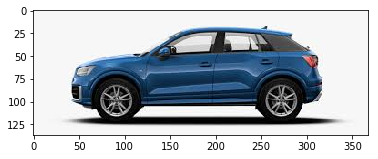

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Ah, now we see our blue car! But did you notice we used another function cv2.cvtColor(image, cv2.COLOR_BGR2RGB), within plt.imshow(). Do you know why? Let's use plt.imshow() without the other function and let's see the difference.

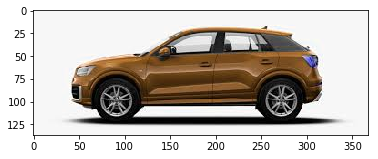

In [8]:
plt.imshow(image)

Is that magic? How did our blue car changed to a brown one with a blue back light instead of red? Well, actually, plt.imshow() by default displays the images in BGR format instead of RGB. So, we would have to explicity do a colour conversion and display the images in the correct format. And hence we will use cv2.cvtColor() for doing this conversion. Now, let's prepare a small utility function which we can call any time, to do this conversion.

In [10]:
# Utility function to display images
def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

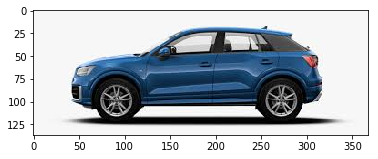

In [29]:
show_image(image)

Thus, our utility function just works fine in displaying images

### Image Dimensions and Data Types

Let's explore our image further and let's see what we can learn.

In [12]:
# Let's print the image dimensions
print(image.shape)

(137, 368, 3)


We see that the shape of our image is (137, 368, 3), which means, it has (137 x 368) pixels in each channel and totally there are 3 coloured channels, namely Red, Green and Blue, which is the default RGB format of the image. The height of the image here is 137 pixels and it's width is 368. Now, what is the data type of the image?

In [13]:
print(type(image))

<class 'numpy.ndarray'>


So, the image, as we had discussed is actually a numpy array of pixel intensity values. What could be the data type of each pixel value?

In [14]:
print(image.dtype)

uint8


Now, this is interesting, each pixel value has the type of 'uint8' which is unsigned int8. Which essentially means, the typical range of pixel values will vary from 0 to 255. Let's see if that is the case.

In [16]:
print('max pixel value:', np.max(image))
print('min pixel value:', np.min(image))

max pixel value: 255
min pixel value: 0


And yes, our image pixel values in the range of [0,255]. Now, here, 0 represents the darkest pixel value, which is pure black, while, 255 represents the lightest pixel value which is pure white.

Let me tell you another strange fact, later which will come handy. Since, our pixel values are of type 'uint8', if we add 1, to the brightest pixel, which is 255, the value won't change to 256 (it won't get any brighter!) rather it will change to 0! So, 255 + 1 = 0 in the unsigned int 8 world! And similarly, if we subtract 1 from the darkest pixel 0, it will be 255 in the world of the unsigned int8.

### Colour Images and extracting channels from image

Previously, we have seen that coloured images have 3 channels, red, green and blue. Now, let's see some utility functions which we can use to convert coloured images to gray scaled images and convert to monochrome images and even convert some of these coloured channels to one another.

In [23]:
# Utility Functions - to convert coloured images to gray scale
def to_gray_scale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

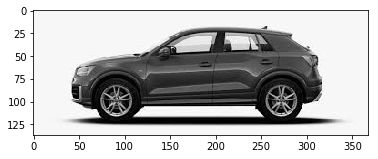

In [19]:
gray_scaled_image = to_gray_scale(image)
show_image(gray_scaled_image)

This is how our gray-scaled image looks like. What do you think, it's shape will be?

In [20]:
print(gray_scaled_image.shape)

(137, 368)


As we thought, it does not have the 3 coloured channels anymore, and hence the dimension changed from (137 x 368 x 3) to just (137 x 368). As a matter of fact, in most cases, we will prefer doing image analysis with gray scaed images, where colour doesn't have a part to play. It significantly reduces the amount of computations which we would need to do.

In [22]:
# Utility Functions - to convert coloured images to monochrome image
def to_monochrome(img, channel = 'R'):
    if channel == 'R':
        monochrome = img[:,:,2]
    if channel == 'G':
        monochrome = img[:,:,1]
    if channel == 'B':
        monochrome = img[:,:,0]
        
    return monochrome

Now, let's see how our monochrome images looks like, using the utility function above.

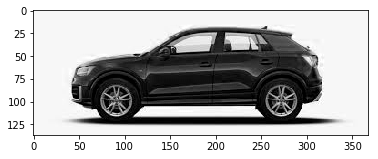

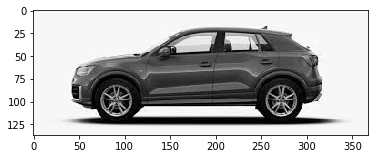

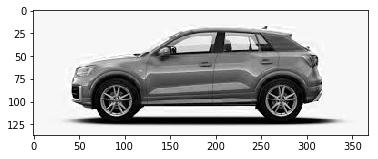

In [24]:
# Red Monochrome
show_image(to_monochrome(image,channel = 'R'))
# Green Monochrome
show_image(to_monochrome(image,channel = 'G'))
# Blue Monochrome
show_image(to_monochrome(image,channel = 'B'))

Do we see any difference? Well all looks gray! But the shade of gray changes based on the channel selected.

Now, let's see a utility functions to swap color channels.

In [34]:
# Utility Functions - to swap colour channels
def swap_color_channels(img, channel1 = 'R', channel2 = 'B'):
    duplicate = img.copy()
    
    dict_color = {'R':2,'G':1,'B':0}
    
    temp = duplicate[:,:,dict_color[channel1]].copy()
    duplicate[:,:,dict_color[channel1]] = duplicate[:,:,dict_color[channel2]].copy()
    duplicate[:,:,dict_color[channel2]] = temp.copy()
        
    return duplicate

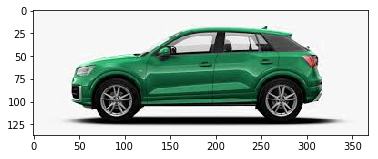

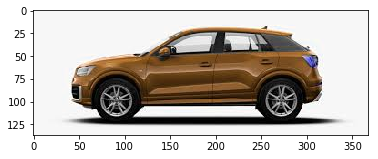

In [37]:
# Swap Blue and Green channels
show_image(swap_color_channels(image,channel1 = 'B', channel2 = 'G'))

# Swap Blue and Red channels
show_image(swap_color_channels(image,channel1 = 'B', channel2 = 'R'))

And, the magic happens again! Our blue car is not blue anymore, when we swap the coloured channel as expected! Let's see the same results with another image.

Original image


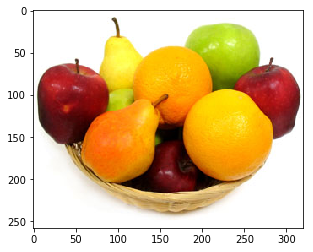

Green and Red channels swapped


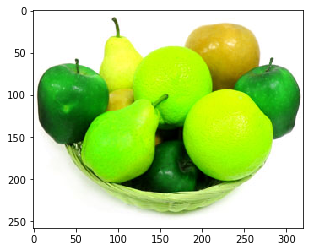

Blue and Red channels swapped


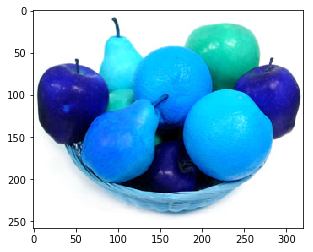

In [39]:
fruit = cv2.imread('dataset/fruit.png')

print('Original image')
show_image(fruit)

print('Green and Red channels swapped')
show_image(swap_color_channels(fruit,channel1 = 'G', channel2 = 'R'))

print("Blue and Red channels swapped")
show_image(swap_color_channels(fruit,channel1 = 'B', channel2 = 'R'))

### Cropping Images

Now, often doing image analysis, we need to pick up a region of interest (RoI) within the entire image. Once we highlight the RoI we usually would have to crop the selected region and extract the cropped portion of the image. 

Example, let's say, in the car image, we are only interested in the front tyre of the car, or in the fruit image we want to get the top portion of the yellow pear. So, how exactly we do that?

First, we would have to highlight the RoIs in our images, and we will be using another utility function to do that.

In [47]:
# Utility function to highlight region of interests
def draw_bounding_box(img, x,y,w,h):
    dupicate = img.copy()
    cv2.line(dupicate, (x,y), (x+w,y), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x,y), (x,y+h), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x,y+h), (x+w,y+h), color = (0,0,255), thickness = 2)
    cv2.line(dupicate, (x+w,y), (x+w,y+h), color = (0,0,255), thickness = 2)
    
    return dupicate

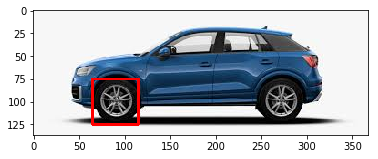

In [48]:
show_image(draw_bounding_box(image, x = 65, y =75, w = 50, h = 50)) 
# Pixel position of the top-left coordinate of the bounding box is represented by x and y
# Height and weight of the bounding box is represented by w and h

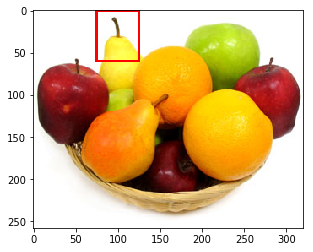

In [53]:
show_image(draw_bounding_box(fruit, x = 75, y =0, w = 50, h = 60)) 
# Pixel position of the top-left coordinate of the bounding box is represented by x and y
# Height and weight of the bounding box is represented by w and h

Now we were able to highlight our RoI for both the images using our utility function, now let's see how to crop and display it.

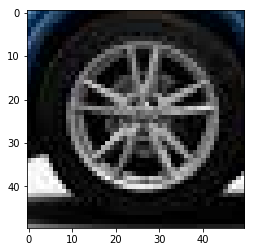

In [56]:
# For the car image
x = 65; y =75; w = 50; h = 50;
cropped_img = image[y:y+h, x:x+w]
show_image(cropped_img)

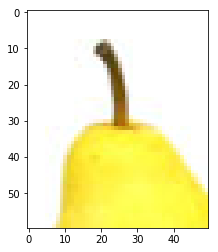

In [57]:
# For the fruit image
x = 75; y =0; w = 50; h = 60;
cropped_img2 = fruit[y:y+h, x:x+w]
show_image(cropped_img2)

And thus we were able to crop and extract our regions of interests! 

**Well, I would like to take this moment to congratulate all my readers for successfully completing the very first section of this book, which gives you a hands on experience of using python to implement various computer vision related scenarios!**

I hope, you have enjoyed what we have learned so far! Because this is just the very tip of the ice-berg, and there are pretty exciting applications of computer vision we will be implementing in the future sections and chapters! So, stay tuned and let's move on the other section of this chapter!